# Distribution of digits in the decimal representation of the square root of primes

In [ ]:
f = 5; l = 20
num = Decimal(3).sqrt()*(10**f)
print(num, int(num), num - int(num), int((num - int(num))*(10**l)))

In [1]:
from decimal import *
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def clip(dec, first, last):
#     getcontext().prec = last
    
    if last - first <= 0:
        print("Argument Error: {} is greater than {}.".format(first, last))
    else:
        int_length = len(str(int(dec)))
        mstr = format(dec, '.{}f'.format(last-int_length)).replace('.','')
    
    return mstr[first:]

In [3]:
def get_hist(mstr):
    return {str(c): mstr.count(str(c)) for c in range(10)}

<Container object of 10 artists>

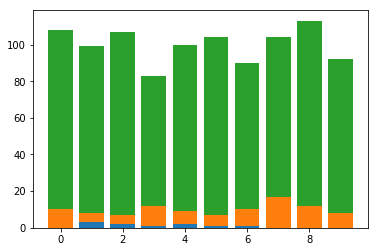

In [4]:
getcontext().prec = 10**3
dec = Decimal(2).sqrt()

mstr = clip(Decimal(2).sqrt(), 0, 10)
hist = get_hist(mstr) 
Y = [list(hist.values())]
plt.bar(range(10), Y[0])

mstr = clip(Decimal(2).sqrt(), 10, 100)
hist = get_hist(mstr)
Y.append(list(hist.values()))
plt.bar(range(10), Y[1], bottom = Y[0])

mstr = clip(Decimal(2).sqrt(), 100, 1000)
hist = get_hist(mstr)
Y.append(list(hist.values()))
plt.bar(range(10), Y[2], bottom = [Y[0][k]+Y[1][k] for k in range(10)])

In [11]:
num = 5
odr = 3

getcontext().prec = 10**odr
dec = Decimal(num).sqrt()

odrs = [10**k for k in range(odr + 1)]

100%|██████████| 3/3 [00:00<00:00, 30.66it/s]


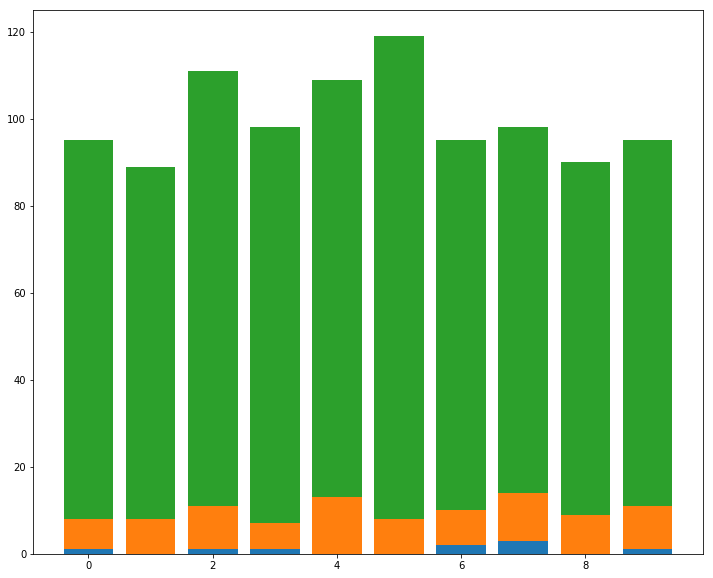

In [12]:
plt.figure(figsize=(12,10))

Y_shift = [0 for k in range(10)]
for i in tqdm(range(odr)):
    mstr = clip(dec, odrs[i], odrs[i+1])
    hist_dic = get_hist(mstr)
    Y = list(hist_dic.values())
    plt.bar(range(10), Y, bottom = Y_shift)
    Y_shift = [Y_shift[k]+Y[k] for k in range(10)]
    
plt.show()

100%|██████████| 3/3 [00:00<00:00, 28.69it/s]


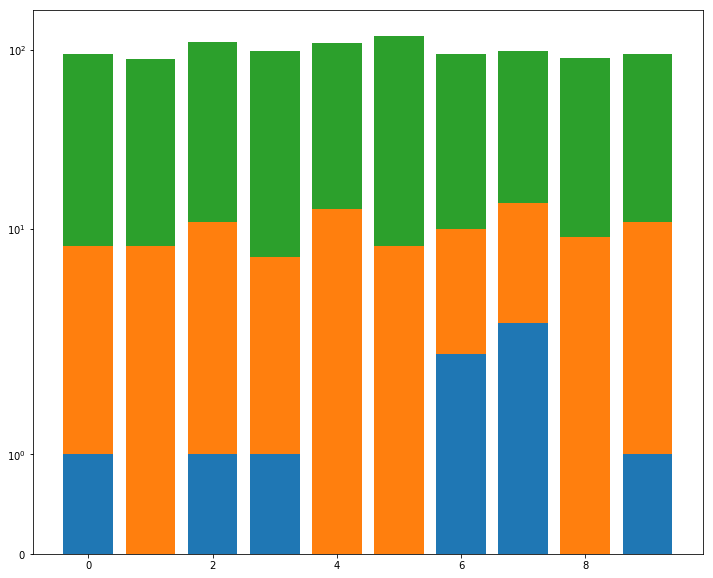

In [13]:
plt.figure(figsize=(12,10))

Y_shift = [0 for k in range(10)]
for i in tqdm(range(odr)):
    mstr = clip(dec, odrs[i], odrs[i+1])
    hist_dic = get_hist(mstr)
    Y = list(hist_dic.values())
    plt.bar(range(10), Y, bottom = Y_shift)
    Y_shift = [Y_shift[k]+Y[k] for k in range(10)]
    plt.yscale('symlog')
    
plt.show()

In [ ]:
odr = 6
getcontext().prec = 10**odr
odrs = [10**k for k in range(odr + 1)]

In [ ]:
plt.figure(figsize=(16,12))

nums = [2, 3, 5, 7, 11, 13, 17, 19, 23]
for k in tqdm(range(len(nums))):
    dec = Decimal(nums[k]).sqrt()
    
    plt.subplot(331+k)
    plt.title('sqrt of {}'.format(nums[k]))

    Y_matrix = [[0 for k in range(10)]]
    for i in range(odr):
        mstr = clip(dec, odrs[i], odrs[i+1])
        hist_dic = get_digits_hist(mstr)
        Y_matrix.append(list(hist_dic.values()))
        plt.bar(range(10), Y_matrix[-1], bottom = Y_matrix[-2])
        plt.xticks(range(10), hist_dic.keys())
    
plt.show()